In [ ]:
### GPU configuration

! nvidia-smi

Fri Sep  8 13:03:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/raja21068/Federated-Learning-For-Medical-Images.git


Cloning into 'Federated-Learning-For-Medical-Images'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Receiving objects: 100% (36/36), 27.55 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
%cd /content/Federated-Learning-For-Medical-Images

[Errno 2] No such file or directory: '/content/Federated-Learning-For-Medical-Images'
/content


In [ ]:
pip install flwr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.9 MB/s eta 0:00:00


In [ ]:
pip install flwr-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.1/202.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
pip install git+https://github.com/adap/flower.git

  Cloning https://github.com/adap/flower.git to /tmp/pip-req-build-jsvoys1v
  Running command git clone --filter=blob:none --quiet https://github.com/adap/flower.git /tmp/pip-req-build-jsvoys1v
  Resolved https://github.com/adap/flower.git to commit d1f06e9a468134879ca28b7678e3b145af83b0f6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for flwr: filename=flwr-1.6.0-py3-none-any.whl size=201702 sha256=02b39a7e89bcac7e9e526ce42dae4e41dcc01287f042185884e927b706709b6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-2m33k9h2/wheels/43/27/ff/f6609f5791eccb405ba3ed0e82f02c1d2a8d247b81065947f9
Successfully built flwr
  Attempting uninstall: flwr
    Found existing installation: flwr 1.5.0
    Uninstalling flwr-1.5.0:
      Successfully uninstalled flwr-1.5.0


In [ ]:
!pip install -q flwr[simulation] torch torchvision matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 47.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import OrderedDict
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10

import flwr as fl
from flwr.common import Metrics

DEVICE = torch.device("cpu")  # Try "cuda" to train on GPU
print(
    f"Training on {DEVICE} using PyTorch {torch.__version__} and Flower {fl.__version__}"
)

Training on cpu using PyTorch 2.0.1+cu118 and Flower 1.6.0


In [ ]:
CLASSES = (
    "EOSINOPHIL",
    "LYMPHOCYTE",
    "MONOCYTE",
    "NEUTROPHIL",
)


In [ ]:
import os
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder

NUM_CLIENTS = 9
BATCH_SIZE = 32
DATA_ROOT = "/content/drive/MyDrive/WBC_segmentation/seg/TRAIN"

def load_datasets():
    # Define data transformation
    transform = transforms.Compose(
        [transforms.Resize((256, 256)),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

    # Load custom dataset
    custom_dataset = ImageFolder(DATA_ROOT, transform=transform)

    # Split custom dataset into train and test
    train_size = int(0.8 * len(custom_dataset))  # 80% for training
    trainset, _ = random_split(custom_dataset, [train_size, len(custom_dataset) - train_size])

    # Split training set into 10 partitions to simulate the individual dataset
    partition_size = len(trainset) // NUM_CLIENTS
    lengths = [partition_size] * NUM_CLIENTS
    datasets = random_split(trainset, lengths)

    # Split each partition into train/val and create DataLoader
    trainloaders = []
    valloaders = []
    for ds in datasets:
        len_val = len(ds) // 10  # 10 % validation set
        len_train = len(ds) - len_val
        ds_train, ds_val = random_split(ds, [len_train, len_val])
        trainloaders.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
        valloaders.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

    # Prepare test dataset
    testset = ImageFolder(DATA_ROOT, transform=transform)
    testloader = DataLoader(testset, batch_size=BATCH_SIZE)

    return trainloaders, valloaders, testloader

trainloaders, valloaders, testloader = load_datasets()


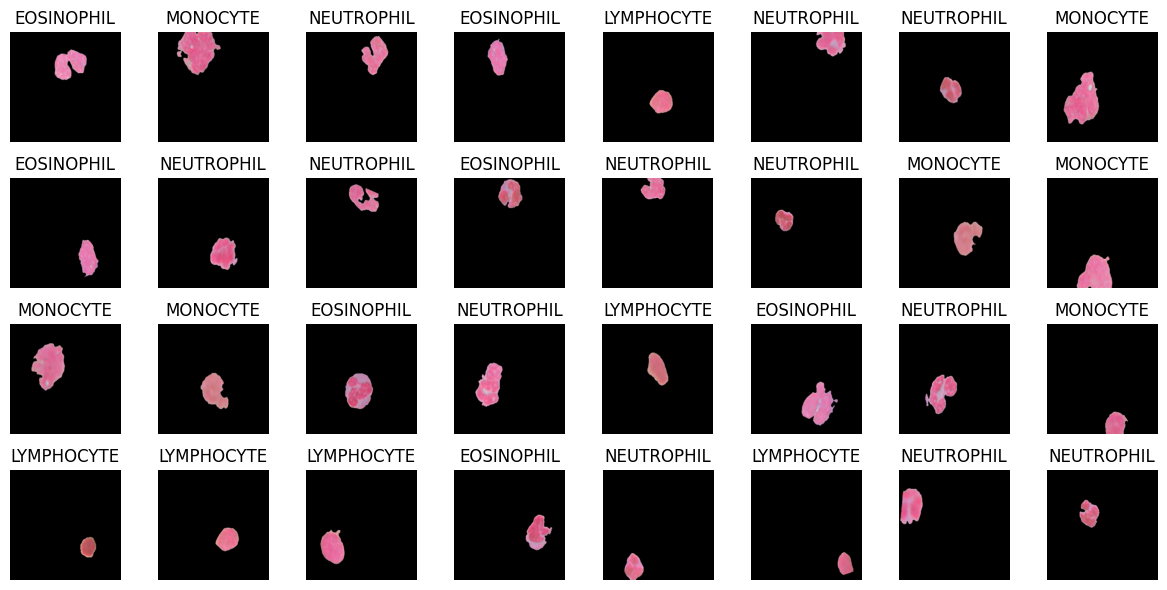

In [ ]:
images, labels = next(iter(trainloaders[0]))

# Reshape and convert images to a NumPy array
# matplotlib requires images with the shape (height, width, 3)
images = images.permute(0, 2, 3, 1).numpy()
# Denormalize
images = images / 2 + 0.5

# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 8, figsize=(12, 6))

# Loop over the images and plot them
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.set_title(CLASSES[labels[i]])
    ax.axis("off")

# Show the plot
fig.tight_layout()
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # Changed input channels from 1 to 3
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)  # Adjusted input size based on pooling and conv layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Define a sequential module
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Define additional layers
        self.fc1 = nn.Linear(64 * 62 * 62, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        # Define dropout layers
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


In [ ]:
def train(net, trainloader, epochs: int, verbose=False):
    """Train the network on the training set."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters())
    net.train()
    for epoch in range(epochs):
        correct, total, epoch_loss = 0, 0, 0.0
        for images, labels in trainloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
        epoch_loss /= len(trainloader.dataset)
        epoch_acc = correct / total
        if verbose:
            print(f"Epoch {epoch+1}: train loss {epoch_loss}, accuracy {epoch_acc}")


def test(net, testloader):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy


In [ ]:
trainloader = trainloaders[0]
valloader = valloaders[0]
net = Net().to(DEVICE)

for epoch in range(30):
    train(net, trainloader, 1)
    loss, accuracy = test(net, valloader)
    print(f"Epoch {epoch+1}: validation loss {loss}, accuracy {accuracy}")

loss, accuracy = test(net, testloader)
print(f"Final test set performance:\n\tloss {loss}\n\taccuracy {accuracy}")

Epoch 1: validation loss 0.05030967430634932, accuracy 0.23863636363636365
Epoch 2: validation loss 0.04508765448223461, accuracy 0.36363636363636365
Epoch 3: validation loss 0.0449187620119615, accuracy 0.3522727272727273
Epoch 4: validation loss 0.04294291003183885, accuracy 0.375
Epoch 5: validation loss 0.0453511354598132, accuracy 0.4318181818181818
Epoch 6: validation loss 0.042221710085868835, accuracy 0.4659090909090909
Epoch 7: validation loss 0.04239957711913369, accuracy 0.5227272727272727
Epoch 8: validation loss 0.04405224052342502, accuracy 0.45454545454545453
Epoch 9: validation loss 0.052931094711477104, accuracy 0.45454545454545453
Epoch 10: validation loss 0.06339713524688374, accuracy 0.4431818181818182
Epoch 11: validation loss 0.0801120861010118, accuracy 0.45454545454545453
Epoch 12: validation loss 0.09145069122314453, accuracy 0.4318181818181818
Epoch 13: validation loss 0.11937415057962592, accuracy 0.4659090909090909
Epoch 14: validation loss 0.130827863108028

In [ ]:
import torch
import torch.optim as optim

# Create an instance of your network
net = model

# Define an optimizer and specify the parameters to optimize
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Example: Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


AttributeError: ignored

In [ ]:
def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]


def set_parameters(net, parameters: List[np.ndarray]):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)

In [ ]:
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, valloader):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, config):
        return get_parameters(self.net)

    def fit(self, parameters, config):
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=1)
        return get_parameters(self.net), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        set_parameters(self.net, parameters)
        loss, accuracy = test(self.net, self.valloader)
        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}

In [ ]:
def client_fn(cid: str) -> FlowerClient:
    """Create a Flower client representing a single organization."""

    # Load model
    net = model.to(DEVICE)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]

    # Create a  single Flower client representing a single organization
    return FlowerClient(net, trainloader, valloader)


In [ ]:
# Create FedAvg strategy
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=3,  # Never sample less than 10 clients for training
    min_evaluate_clients=1,  # Never sample less than 5 clients for evaluation
    min_available_clients=3,  # Wait until all 10 clients are available
)

# Specify client resources if you need GPU (defaults to 1 CPU and 0 GPU)
client_resources = None
if DEVICE.type == "cuda":
    client_resources = {"num_gpus": 1}

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
    client_resources=client_resources,
)


INFO flwr 2023-09-07 05:52:31,078 | app.py:176 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2023-09-07 05:52:38,001	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2023-09-07 05:52:40,119 | app.py:211 | Flower VCE: Ray initialized with resources: {'object_store_memory': 3889105305.0, 'memory': 7778210612.0, 'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'object_store_memory': 3889105305.0, 'memory': 7778210612.0, 'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO flwr 2023-09-07 05:52:40,131 | app.py:219 | No `client_resources` specified. Using minimal resources for clients.
INFO:flwr:No `client_resources` specified. Using minimal resources for clients.
INFO flwr 2023-09-07 05:52:40,138 | app.py:225 | Flower VCE: Resources for each Virtual Clie

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]

    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples)}

In [ ]:
# Create FedAvg strategy
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,
    fraction_evaluate=0.5,
    min_fit_clients=3,
    min_evaluate_clients=1,
    min_available_clients=3,
    evaluate_metrics_aggregation_fn=weighted_average,  # <-- pass the metric aggregation function
)

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
    client_resources=client_resources,
)

INFO flwr 2023-09-06 18:41:07,670 | app.py:176 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2023-09-06 18:41:13,059	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2023-09-06 18:41:15,269 | app.py:211 | Flower VCE: Ray initialized with resources: {'object_store_memory': 3967817318.0, 'node:__internal_head__': 1.0, 'memory': 7935634638.0, 'CPU': 2.0, 'node:172.28.0.12': 1.0, 'GPU': 1.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'object_store_memory': 3967817318.0, 'node:__internal_head__': 1.0, 'memory': 7935634638.0, 'CPU': 2.0, 'node:172.28.0.12': 1.0, 'GPU': 1.0}
INFO flwr 2023-09-06 18:41:15,281 | app.py:219 | No `client_resources` specified. Using minimal resources for clients.
INFO:flwr:No `client_resources` specified. Using minimal resources for clients.
INFO flwr 2023-09-06 18:41:15,287 | app.py:225 | Flower VCE: Resourc

History (loss, distributed):
	round 1: 0.04761152748357166
	round 2: 0.04003636708313768
	round 3: 0.039391534233635124
	round 4: 0.03779027729549191
	round 5: 0.03713653575290333
History (metrics, distributed, evaluate):
{'accuracy': [(1, 0.33522727272727276), (2, 0.4943181818181818), (3, 0.4801136363636364), (4, 0.5227272727272728), (5, 0.4943181818181818)]}

In [ ]:
pip install ray


In [ ]:
import ray


In [ ]:
pip install -U flwr["simulation"]

In [ ]:
import ray  # Add this import statement
import flwr as fl

# Create FedAvg strategy
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=3,  # Never sample less than 10 clients for training
    min_evaluate_clients=1,  # Never sample less than 5 clients for evaluation
    min_available_clients=3,  # Wait until all 10 clients are available
)

# Specify client resources if you need GPU (defaults to 1 CPU and 0 GPU)
client_resources = None
if DEVICE.type == "cuda":
    client_resources = {"num_gpus": 1}


# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
    client_resources=client_resources,
)


INFO flwr 2023-09-06 18:54:41,508 | app.py:176 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2023-09-06 18:54:48,182	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2023-09-06 18:54:51,471 | app.py:211 | Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'memory': 7923688244.0, 'CPU': 2.0, 'object_store_memory': 3961844121.0, 'node:172.28.0.12': 1.0, 'GPU': 1.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'memory': 7923688244.0, 'CPU': 2.0, 'object_store_memory': 3961844121.0, 'node:172.28.0.12': 1.0, 'GPU': 1.0}
INFO flwr 2023-09-06 18:54:51,488 | app.py:219 | No `client_resources` specified. Using minimal resources for clients.
INFO:flwr:No `client_resources` specified. Using minimal resources for clients.
INFO flwr 2023-09-06 18:54:51,496 | app.py:225 | Flower VCE: Resourc

History (loss, distributed):
	round 1: 0.045653367584401916
	round 2: 0.03983357514847408
	round 3: 0.03944618424231355
	round 4: 0.03823516399345614
	round 5: 0.03803360665386373